## Exercise 1

In [85]:
# Metadata
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict 

In [87]:
df = pd.read_csv('train.csv') 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Q1:
Use the titanic data set, perform preprocessing by deal with missing values, drop 
irrelevant attributes.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
# Cabin has many missing values and name does not provide any additional value, so both these columns can be discarded.
df.drop(['Name', 'Cabin'], axis = 1, inplace = True)

In [91]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [92]:
df.Ticket.unique().shape

(681,)

In [49]:
df.drop(['Ticket'], axis = 1, inplace = True) 
# dropping 'Ticket' column from the data as it has 681 unique values which will not help in forming patterns.

In [50]:
df_copy = df.copy() 
df_copy.PassengerId = df_copy.PassengerId//100 
table = pd.crosstab(df_copy.PassengerId, df_copy.Survived) 

In [51]:
percent_s = table[1]/(table[0] + table[1]) 
percent_s 

PassengerId
0    0.414141
1    0.280000
2    0.380000
3    0.490000
4    0.370000
5    0.420000
6    0.360000
7    0.370000
8    0.369565
dtype: float64

In [52]:
percent_s.describe()

count    9.000000
mean     0.383745
std      0.056401
min      0.280000
25%      0.369565
50%      0.370000
75%      0.414141
max      0.490000
dtype: float64

In [53]:
df.drop(['PassengerId'], axis = 1, inplace = True) # dropping 'PassengerId'

In [54]:
df.Age.describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

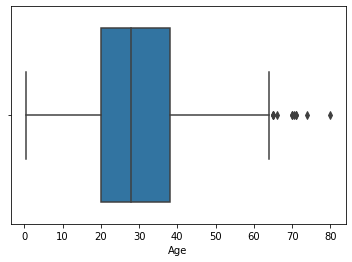

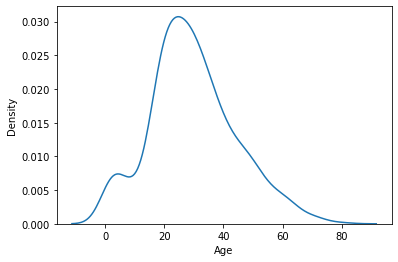

In [55]:
# visualising the distribution of Age before filling in missing values
sns.boxplot(x = df.Age) 
plt.show()
sns.kdeplot(x = df.Age)
plt.show()

In [56]:
df.Age.fillna(value = df.Age.mean(), inplace = True) # replacing all missing values of Age with mean of Age

In [57]:
df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

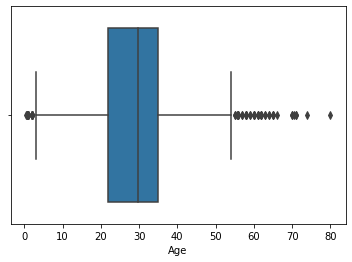

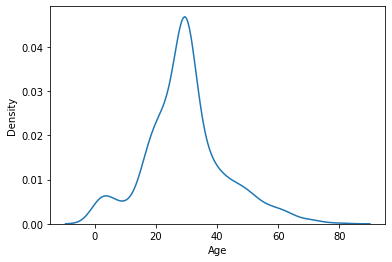

In [58]:
# visualising the new distribution of Age after filling in missing values
sns.boxplot(x = df.Age) 
plt.show()
sns.kdeplot(x = df.Age)
plt.show()

In [59]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [60]:
df.Embarked.fillna(value = df.Embarked.mode()[0], inplace = True) # replacing null values with the value with highest frequency

In [61]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Q2:
Use the scikit learn pipelines to perform the preprocessing - standardizing, 
encoding and model fitting in one step

In [62]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
Y = df.Survived 
df.drop('Survived', axis = 1, inplace = True) # dropping target variable from dataset
X = df

In [64]:
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

In [65]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features ),
        ('categoric', OneHotEncoder(sparse = False, handle_unknown='ignore'), categorical_features)
    ])

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 920)

In [67]:
# creating the pipeline for the model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])

#fitting the model to the dataset
model_pipeline.fit(X_train, Y_train)
pred_y = model_pipeline.predict(X_test)
accuracy_score(Y_test, pred_y)

0.835820895522388

Upon running the model simply using gaussian naive bayes, we are getting an accuracy of 83.58%

## Q3:
Perform Bayes classification using cross validation.

In [93]:
cv_score = cross_val_score(model_pipeline, X, Y, cv=5, scoring = 'accuracy') 

In [94]:
cv_score.mean()

0.7890276818780995

Upon performing Cross validation, with number of folds = 5, we get a mean accuracy of 78.9%

## Q4:
Tabulate using relevant measures of accuracy , Sensitivity and specificity

In [95]:
test_pred = model_pipeline.predict(X_test)

In [96]:
model_acc = accuracy_score(Y_test, test_pred) 

In [97]:
model_acc

0.835820895522388

In [73]:
conf_mat = confusion_matrix(Y_test, test_pred) 

In [74]:
((tn, fp),(fn, tp)) = conf_mat 

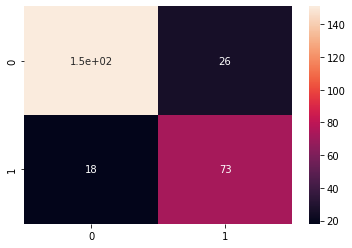

In [75]:
#visualising the confusion matrix
sns.heatmap( conf_mat, annot = True)
plt.show()

In [76]:
# calculating recall/sensitivity and specificity
recall = tp/(tp+fn)
specificity = tn/(tn+fp)

In [77]:
print(f"Model Accuracy: {model_acc:.6f}\nRecall: {recall:.6f}\nSpecificity: {specificity:.6f}")

Model Accuracy: 0.835821
Recall: 0.802198
Specificity: 0.853107


## Q5:
Visualize the ROC curve and comment on performance

In [78]:
test_pred_proba = model_pipeline.predict_proba(X_test)

In [79]:
roc = roc_curve(Y_test, test_pred_proba[:,0])

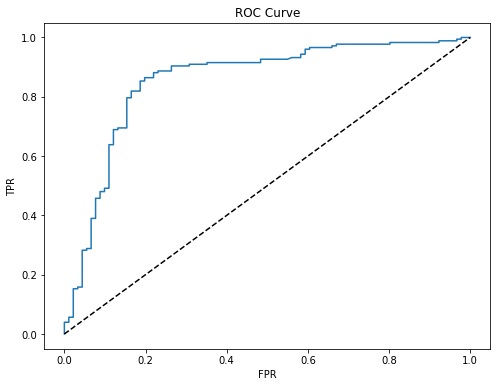

In [80]:
plt.figure(figsize = (8,6))
plt.plot(roc[1], roc[0])
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()